In [1]:
# Import Libraries
import os
import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

# Preprocessing
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten

# Metric
from sklearn.metrics import classification_report

# Inference
from tensorflow.io import read_file
from tensorflow.image import decode_image, resize
from tensorflow import expand_dims
from PIL import Image
import requests

import warnings
warnings.filterwarnings('ignore')

# Inference

In [2]:
# Load saved model
model = load_model('my_model.h5')

In [3]:
# Define function to load images
def load_inf_image(img):
  # img = tf.io.read_file(filepath) # Read image file
  img = tf.io.decode_image(img, channels=3, expand_animations=False) # Decode any image to rgb channels
  img = tf.image.resize(img, (128, 128)) # resize image to 128x128
  img = tf.cast(img, tf.uint8) # Convert image to uint8
  return img

In [9]:
# Inference Image
inf6 = load_inf_image(tf.io.read_file("F:\Hacktiv8\FTDS009\Graded\Milestone\p2---ftds009---finalproject-KamilRiyadi_classification\Img_Class_Dataset\images\lasagna\\18140.jpg"))

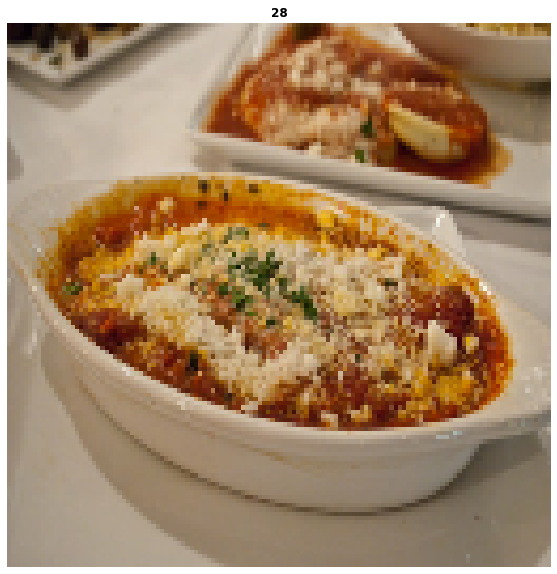

In [10]:
# Prediction
plt.figure(figsize=(10, 10))
res = model.predict(x=expand_dims(inf6, axis=0))
res_idx = np.argmax(res, axis=1)[0]

plt.imshow(inf6)
plt.title(f'{res_idx}', fontsize=12, weight='bold')
plt.axis('off')

plt.show()

# # Show Nutritional Facts
# print('Nutritional Facts')
# df_nutrition[df_nutrition['Nama_Makanan']==inv_classes_mapping[res_idx]]

In [6]:
print(res.tolist())

[[4.335376161179738e-06, 3.4599195730677934e-10, 3.817786087267905e-09, 2.5167226525013575e-08, 1.7511919736534765e-07, 1.509723972503707e-07, 1.329126031457406e-09, 4.57126836383992e-10, 1.9607482215633354e-07, 2.176697364575375e-07, 1.895825163522602e-10, 1.2040770513976895e-07, 8.236696658059373e-07, 3.0067867640148904e-10, 6.467060220671783e-11, 2.3407125127050676e-08, 3.896299949346371e-10, 2.029634742939379e-05, 5.681371817445324e-09, 1.9271579887458756e-09, 8.495566229671514e-12, 0.9991757273674011, 8.259534167720517e-10, 0.00013650523032993078, 7.697298133280128e-05, 2.306456963196979e-06, 0.0005134863895364106, 8.147799102076192e-10, 6.658049187535653e-06, 3.813579674272205e-09, 1.037126828862256e-08, 2.668817597473172e-11, 1.8449041817802936e-05, 3.583630677894689e-05, 6.286184543569107e-06, 5.9896327897490664e-09, 1.2589127962314706e-08, 5.457678198261817e-10, 1.1988247061722745e-09, 1.1907798125321278e-06, 1.4922033608755214e-09, 4.2329525995477013e-10, 1.5626722138506466e-

In [6]:
#  Save images URL from the net

url = [
       'https://media-cdn.tripadvisor.com/media/photo-s/1b/b5/0e/a5/pizza-hut-belfield.jpg'
]

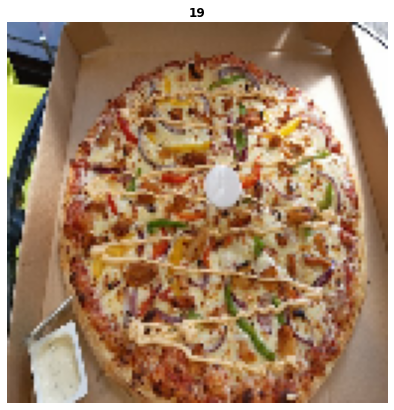

In [13]:
# Predict and show result
plt.figure(figsize=(48, 7))
# plt.suptitle('Prediction Results', fontsize=15)

for i in range(len(url)):
    response = requests.get(url[i])
    img = load_inf_image(response.content) 

    plt.subplot(1, len(url), i+1)
    plt.imshow(img)

    res = model.predict(x=expand_dims(img, axis=0))
    res_idx = np.argmax(res, axis=1)[0]

    plt.title(f'{res_idx}', fontsize=12, weight='bold')
    plt.axis('off')
plt.show() 